In [12]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import numpy as np

In [14]:
sbi =  yf.Ticker(str('SBIN')+'.NS').history(period="40d")

In [15]:
sbi

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-28,725.582229,747.022668,724.746272,739.941406,21705116,0.0,0
2024-04-01,746.530904,748.940508,739.695519,745.793274,9949971,0.0,0
2024-04-02,745.694936,756.070922,740.924892,753.759705,15713063,0.0,0
2024-04-03,752.284476,759.857432,747.612818,758.333008,19136981,0.0,0
2024-04-04,762.217865,762.512905,745.596574,746.776794,15889530,0.0,0
2024-04-05,745.449067,755.038259,740.187269,752.136902,9939620,0.0,0
2024-04-08,753.415466,757.300331,749.235562,755.628357,9797174,0.0,0
2024-04-09,755.775913,759.709940,748.547101,751.596008,7465892,0.0,0
2024-04-10,753.858050,767.823860,751.055079,766.201050,14530669,0.0,0


In [40]:
num_periods = 20
K = 2 / (num_periods + 1) 
ema_p = 0
ema_values = []

In [41]:
i = 0
for close_price in sbi['Close']:
    if (ema_p == 0): # first observation, EMA = current-price
        ema_p = close_price
        ema_values.append(ema_p)
    else:
        ema_p = (close_price - ema_p) * K + ema_p
        ema_values.append(ema_p)

In [44]:


sbi['ema_values'] = pd.Series(ema_values, index = sbi.index)

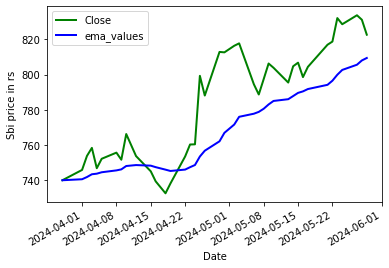

In [45]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Sbi price in rs')
sbi['Close'].plot(ax=ax1, color='g', lw=2., legend=True)
sbi['ema_values'].plot(ax=ax1, color='b', lw=2., legend=True)
# plt.savefig('ema.png')
plt.show()

We used a list (ema_values) to track EMA values computed so far.
On each new observation of close price, we decay the difference from the
 old EMA value and update the old EMA value slightly to find the
 new EMA value.
Finally, the matplotlib plot shows the difference between EMA and non-EMA prices.

From the plot, it is observed that EMA has a very similar smoothing effect to SMA, as
expected, and it reduces the noise in the raw prices. However the extra parameter, ,
available in EMA in addition to the parameter , allows us to control the relative weight
placed on the new price observation, as compared to older price observations. This allows
us to build different variants of EMA by varying the parameter to make fast and slow
EMAs, even for the same parameter, .